Do the following on titanic dataset

In [3]:
import numpy as np
import pandas as pd

1. Load the dataset into python environment

In [4]:
titanic_df = pd.read_csv('/content/titanic_dataset.csv')

2. Make ‘PassengerId’ as the index column

In [6]:
titanic_df.set_index('PassengerId', inplace=True)

In [7]:
titanic_df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


3. Check the basic details of the dataset

In [8]:
print(titanic_df.describe())

         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


4. Fill in all the missing values present in all the columns in the dataset


In [9]:
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
titanic_df_filled = titanic_df.fillna(method='ffill')

In [12]:
titanic_df_filled.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       1
Embarked    0
dtype: int64

5. Check and handle outliers in at least 3 columns in the dataset

In [13]:
import matplotlib.pyplot as plt

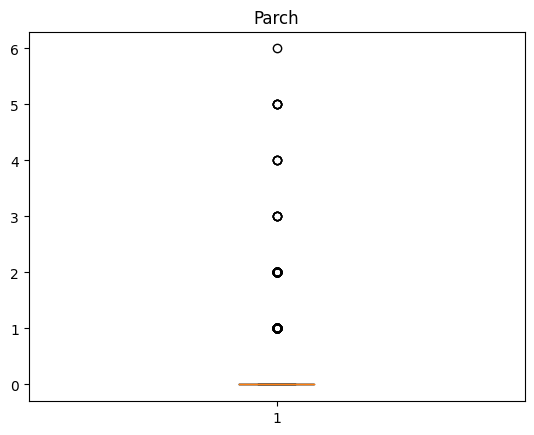

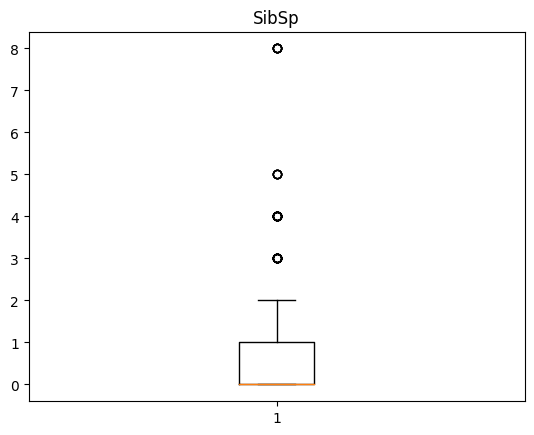

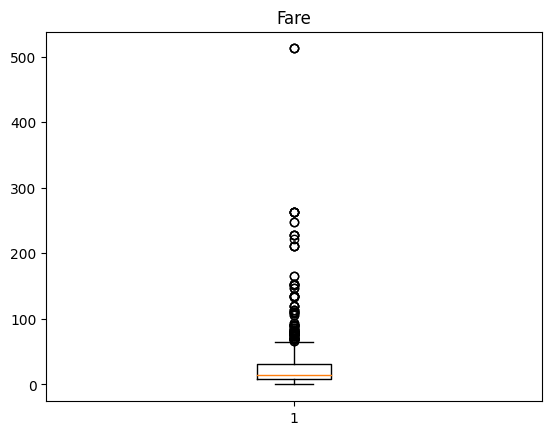

In [14]:
num_coloums=['Parch','SibSp','Fare']
for i in num_coloums:
  plt.figure()
  plt.boxplot(titanic_df[i])
  plt.title(i);

In [15]:
Q1=np.percentile(titanic_df['Fare'],25,method='midpoint')
Q2=np.percentile(titanic_df['Fare'],50,method='midpoint')
Q3=np.percentile(titanic_df['Fare'],75,method='midpoint')
print("Q1 is: ", Q1)
print("Q2 is: " ,Q2)
print("Q3 is: " ,Q3)

Q1 is:  7.9104
Q2 is:  14.4542
Q3 is:  31.0


In [16]:
IQR = Q3 - Q1


In [17]:
IQR

23.0896

In [18]:
lower_lmt = Q1 - 1.5 * IQR
upper_lmt = Q3 + 1.5 * IQR
print("lower value :",lower_lmt)
print("upper value :",upper_lmt)

lower value : -26.724
upper value : 65.6344


In [20]:
outliers =[]

for x in titanic_df['Fare']:
  if((x < lower_lmt) or (x > upper_lmt)):
    outliers.append(x)

In [21]:
print(outliers)

[71.2833, 263.0, 146.5208, 82.1708, 76.7292, 80.0, 83.475, 73.5, 263.0, 77.2875, 247.5208, 73.5, 77.2875, 79.2, 66.6, 69.55, 69.55, 146.5208, 69.55, 113.275, 76.2917, 90.0, 83.475, 90.0, 79.2, 86.5, 512.3292, 79.65, 153.4625, 135.6333, 77.9583, 78.85, 91.0792, 151.55, 247.5208, 151.55, 110.8833, 108.9, 83.1583, 262.375, 164.8667, 134.5, 69.55, 135.6333, 153.4625, 133.65, 66.6, 134.5, 263.0, 75.25, 69.3, 135.6333, 82.1708, 211.5, 227.525, 73.5, 120.0, 113.275, 90.0, 120.0, 263.0, 81.8583, 89.1042, 91.0792, 90.0, 78.2667, 151.55, 86.5, 108.9, 93.5, 221.7792, 106.425, 71.0, 106.425, 110.8833, 227.525, 79.65, 110.8833, 79.65, 79.2, 78.2667, 153.4625, 77.9583, 69.3, 76.7292, 73.5, 113.275, 133.65, 73.5, 512.3292, 76.7292, 211.3375, 110.8833, 227.525, 151.55, 227.525, 211.3375, 512.3292, 78.85, 262.375, 71.0, 86.5, 120.0, 77.9583, 211.3375, 79.2, 69.55, 120.0, 93.5, 80.0, 83.1583, 69.55, 89.1042, 164.8667, 69.55, 83.1583]


In [22]:
titanic_df['Fare']=titanic_df['Fare'].clip(lower=lower_lmt,upper=upper_lmt)
outliers =[]

for x in titanic_df['Fare']:
  if((x < lower_lmt) or (x > upper_lmt)):
    outliers.append(x)

In [23]:
print(outliers)

[]


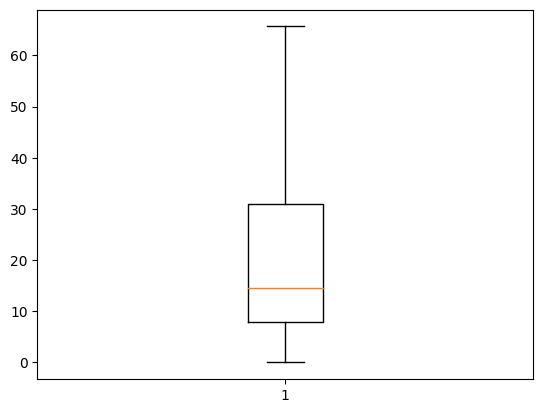

In [24]:
plt.boxplot(titanic_df['Fare'])
plt.show;

In [30]:
Q1=np.percentile(titanic_df['SibSp'],25,method='midpoint')
Q2=np.percentile(titanic_df['SibSp'],50,method='midpoint')
Q3=np.percentile(titanic_df['SibSp'],75,method='midpoint')
print("Q1 is: ", Q1)
print("Q2 is: " ,Q2)
print("Q3 is: " ,Q3)

Q1 is:  0.0
Q2 is:  0.0
Q3 is:  1.0


In [31]:
IQR = Q3 - Q1


In [32]:
IQR

1.0

In [33]:
lower_lmt1 = Q1 - 1.5 * IQR
upper_lmt1 = Q3 + 1.5 * IQR
print("lower value :",lower_lmt1)
print("upper value :",upper_lmt1)

lower value : -1.5
upper value : 2.5


In [50]:
outliers =[]

for y in titanic_df['SibSp']:
  if((y < lower_lmt1) or (y > upper_lmt1)):
    outliers.append(y)

In [51]:
print(outliers)

[1.0, 1.0, 1.0, 2.5, 1.0, 1.0, 1.0, 2.5, 1.0, 2.5, 1.0, 2.5, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.5, 1.0, 1.0, 1.0, 2.5, 1.0, 2.5, 1.0, 2.5, 2.0, 2.5, 1.0, 2.5, 1.0, 2.5, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.5, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.5, 2.5, 1.0, 2.5, 1.0, 1.0, 2.5, 2.5, 2.5, 2.0, 1.0, 1.0, 1.0, 1.0, 2.5, 1.0, 1.0, 1.0, 1.0, 1.0, 2.5, 1.0, 2.5, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.5, 1.0, 2.5, 1.0, 1.0, 2.5, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.5, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.5, 1.0, 1.0, 2.5, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.5, 1.0, 2.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.5, 2.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0,

In [52]:
titanic_df['SibSp']=titanic_df['SibSp'].clip(lower=lower_lmt1,upper=upper_lmt1)
outliers =[]

for x in titanic_df['SibSp']:
  if((x < lower_lmt1) or (x > upper_lmt1)):
    outliers.append(x)

In [53]:
print(outliers)

[]


6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [25]:
x = titanic_df[['Survived']]

In [26]:
x

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
minmax = MinMaxScaler()
x_minmax = minmax.fit_transform(x)
x_minmax=pd.DataFrame(x_minmax)

In [29]:
x_minmax.describe()

,0
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000
